## Simple Linear Regression (SLR)

To understand the relationship bw 2 variables.

1. The predictor (independent) variable x.
2. The target (dependent) variable y.

> y_hat = b0 + b1*x

b0: the intercept (the value of y when x is 0)

b1: the slope (the value with which y changes when x increases by 1 unit)

Assuming a small random value is added to the point on the line (the noise).

## Multiple Linear Regression (MLR)

Is used to explain the relationship bw:

1. Two or more predictor (x) variables.
2. One continuous target (y) variable.

> y_hat = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4

b0: intercept (x=0)

b1: the coefficient or parameter of x1

b2: the coefficient or parameter of x2 and so on..

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
path="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [108]:
from sklearn.linear_model import LinearRegression

### Linear Regression 

In [109]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
x = df[["highway-mpg"]]
y = df["price"]

In [111]:
#fit the linear model

lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
#output the prediction

yhat=lm.predict(x)
yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [113]:
print("Intercept =", lm.intercept_)
print("Slope =", lm.coef_)

Intercept = 38423.305858157386
Slope = [-821.73337832]


#### Plugging in the actual values

price = 38423.31 - 821.73*highway-mpg

In [114]:
#Step1: Create an object

lm1=LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
#Step2: Train the model

lm1.fit(df[["engine-size"]],df["price"])
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
#Step3: Find the slope and intercept

print(lm1.coef_)

print(lm1.intercept_)

[166.86001569]
-7963.338906281049


In [117]:
#Step4: Write the equation

#price = -7963.34 + 166.86*engine-size

### Multiple Linear Regression

In [118]:
z = df[["horsepower","curb-weight","engine-size","highway-mpg"]]

In [119]:
#fit the linear model

lm.fit(z, df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
lm.intercept_

-15806.624626329198

In [121]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [122]:
lm2 = LinearRegression()
lm2.fit(df[["normalized-losses","highway-mpg"]], df["price"]) 

#shorter code

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [124]:
lm2.intercept_

38201.31327245728

In [125]:
#price = 38201.31 + 1.50*normalized-losses - 820.45*highway-mpg

## Regression Plot

Gives a good estimate of:

1. The relationship bw 2 variables
2. The strength of the correlation
3. The direction of the relationship (positive or negative)

Shows a combination of:

1. The scatterplot: each point represents a different y
2. The fitted linear regression line (yhat)

## Residual Plot

Represents the error bw the actual value.

Examining the predicted value and actual value to see a difference by subtracting the predicted value and the actual targeted value.

Expect the results to have zero mean, distributed evenly around the x axis with similar variance. No curvature.

## Distribution Plot

Counts the predicted value vs the actual value.

For visualizing models with more than one independent variable or feature. 

In [126]:
import seaborn as sns
%matplotlib inline

(0.0, 48158.79724210823)

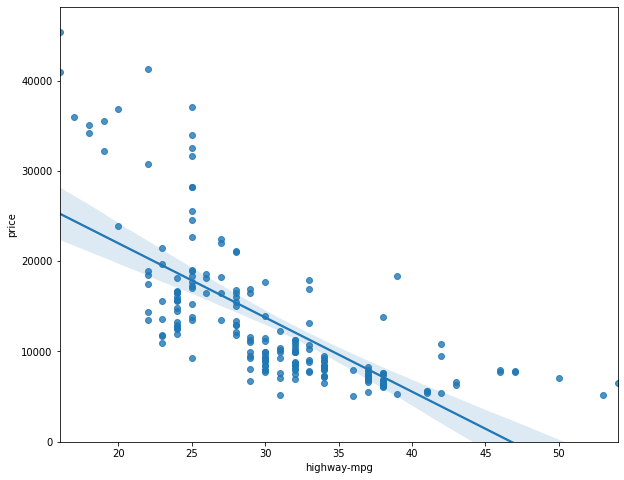

In [127]:
width = 10
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [128]:
#if the data is too far off from the line
#this linear model might not be the best model for this data

(0.0, 47414.1)

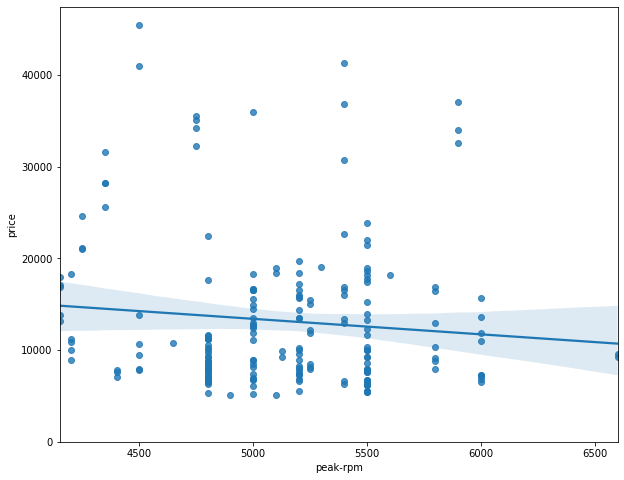

In [129]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [130]:
df[["peak-rpm","highway-mpg","price"]].corr()

#The variable "highway-mpg" has a stronger correlation with "price"
#it is approximate -0.704692 compared to "peak-rpm" which is approximate -0.101616.

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [131]:
#residual plot

#pay attention to the spread of the residuals

#if the points are randomly spread out around the x-axis => a linear model is appropriate.

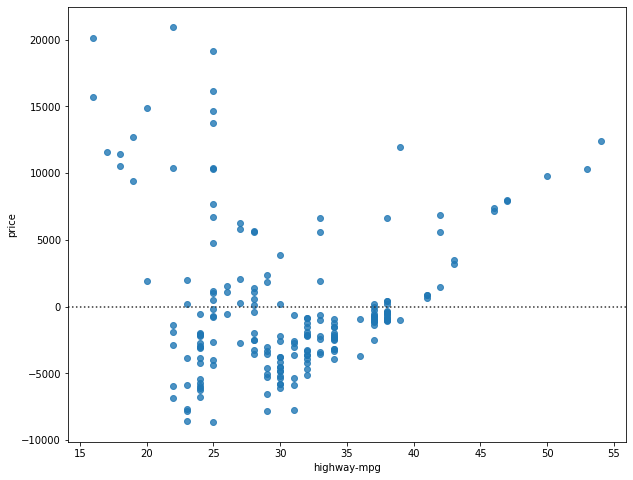

In [132]:
plt.figure(figsize=(width, height))
sns.residplot(df["highway-mpg"], df["price"])
plt.show()

#the residuals are not randomly spread around the x-axis
#maybe a non-linear model is more appropriate for this data

In [133]:
#multiple linear reg

#make a prediction

lm3 = LinearRegression()

z = df[["horsepower","curb-weight","engine-size","highway-mpg"]]

lm3.fit(z, df["price"])

y_hat = lm3.predict(z)

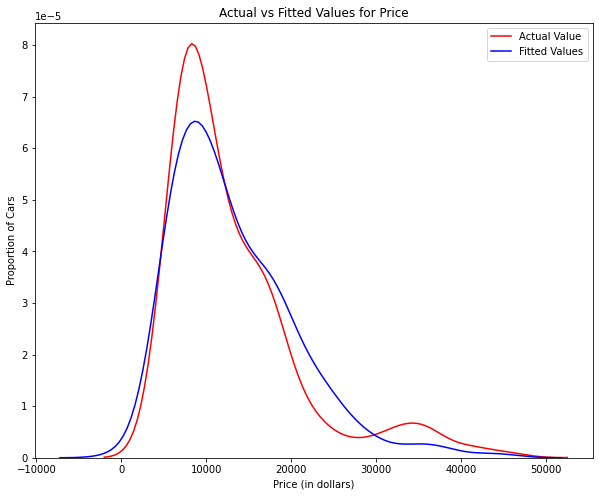

In [134]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Polynomial Regression and Pipelines

#### Polynomial Reg

Transform the data into a polynomial --> use linear reg to fit the parameter.

Useful for describing curvilinear relationships.

1. Quadratic/ 2nd order 

> y_hat = b0 + b1.x1 + b2.x1^2

2. Cubic/ 3rd order

> y_hat = b0 + b1.x1 + b2.x1^2 + b3.x1^3

3. Higher order

> y_hat = b0 + b1.x1 + b2.x1^2 + b3.x1^3 + ...

The relationship bw the variable and the parameter is always linear.

In [135]:
#use the following function to plot the data

def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, ".", x_new, y_new, "-")
    plt.title("Polynomial Fit with Matplotlib for Price ~ Length")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("Price of Cars")
    
    plt.show()
    plt.close()

In [136]:
#get the variables

x = df["highway-mpg"]
y = df["price"]

In [137]:
#fit the polynomial 
#cubic

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


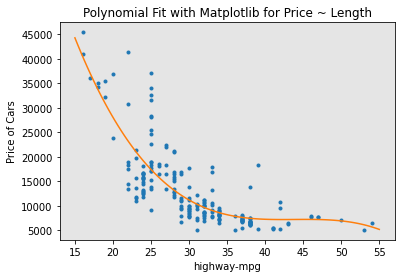

In [138]:
PlotPolly(p, x, y, "highway-mpg")

In [139]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


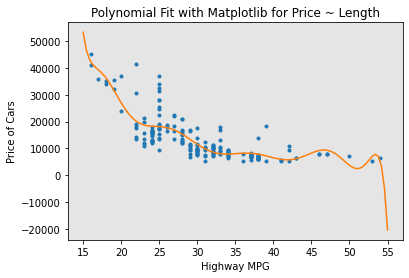

In [140]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Highway MPG')

In [141]:
#perform a polynomial transform on multiple features

from sklearn.preprocessing import PolynomialFeatures

In [142]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [143]:
z_pr=pr.fit_transform(z)

In [144]:
z.shape

(201, 4)

In [145]:
z_pr.shape

(201, 15)

In [146]:
#pipeline

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [148]:
input = [("scale",StandardScaler()),("polynomial",PolynomialFeatures(include_bias=False)),("model",LinearRegression())]

In [149]:
pipe=Pipeline(input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [150]:
pipe.fit(z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [151]:
ypipe=pipe.predict(z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [152]:
input = [("scale",StandardScaler()),("model",LinearRegression())]

pipe=Pipeline(input)

pipe.fit(z,y)

ypipe=pipe.predict(z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## Measures for In-Sample Evaluation

A way to numerically determine how good the model fits on dataset.

Two important measures to determine the fit of a model:

1. Mean Squared Error (MSE)

Mesures the average of the squares of errors (the difference bw actual value y and the estimated value yhat.

2. R-squared (R^2)/ The coefficient of determination:

To determine how close the data is to the fitted regression line.

> R^2 = (1 - MSE of reg line/MSE of the avg of the data)

The 0 value of R^2 indicates the model perform worst.

In [156]:
#MODEL 1: SIMPLE LINEAR REGRESSION 

#calculate the R^2
x = df[["highway-mpg"]]
y = df["price"]

lm.fit(x,y)

print("The R-square is: ", lm.score(x,y))

#~49.659% of the variation of the price is explained.

The R-square is:  0.4965911884339175


In [159]:
#calculate the MSE

y_hat = lm.predict(x)
print("The output of the first 4 predicted value is: ", y_hat[0:4])

The output of the first 4 predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [162]:
#import the function mean_squared_error

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df["price"], y_hat)
print("The mean square error of the price and predicted value is: ", mse)

The mean square error of the price and predicted value is:  31635042.944639895


In [165]:
#MODEL 2: MULTIPLE LINEAR REGRESSION

lm.fit(z, df["price"])

print("The R-square is: ", lm.score(z, df["price"]))

The R-square is:  0.8093562806577457


In [167]:
y_predict_multifit = lm.predict(z)
print("The mean square error of price and predicted value using multifit is: ",\
      mean_squared_error(df["price"], y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [169]:
#MODEL 3: POLYNOMIAL FIT

from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print("The R-square value is: ", r_squared)

#~67.419% of the variation of price is explained by this polynomial fit.

The R-square value is:  0.6741946663906513


In [170]:
mean_squared_error(df["price"], p(x))

20474146.42636125

## Determining a Good Model Fit

1. Do the predicted values make sense?
2. Visualization.
3. Numerical measures for evaluation.
4. Comparing models.

In [173]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [178]:
#create a new input

new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [179]:
#fit the model

lm.fit(x,y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
#produce a prediction

yhat = lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

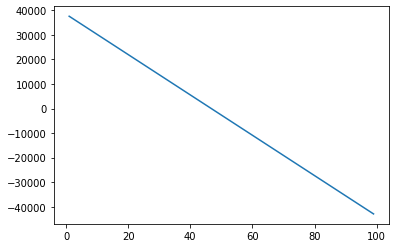

In [181]:
plt.plot(new_input, yhat)
plt.show()

#### The model with the HIGHER R-squared value is a better fit for the data.

#### The model with the SMALLEST MSE value is a better fit for the data.